In [14]:
#Level 3: Advanced Data Analysis

In [15]:
#Task 3.1: Pattern Analysis
#Analyze the distribution of train journeys throughout the week. Visualize the results using bar plots or histograms.
#Identify patterns or trends in the train operations based on source and destination stations.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
df = pd.read_csv(r'D:\internship\New folder 1\Railway_info.csv')

In [18]:
# Clean and standardize 'days' column
df['days'] = df['days'].str.strip().str.capitalize()

In [19]:
# Count train journeys per day
journey_counts = df['days'].value_counts().sort_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1968\1876088587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=journey_counts.index, y=journey_counts.values, palette='viridis')


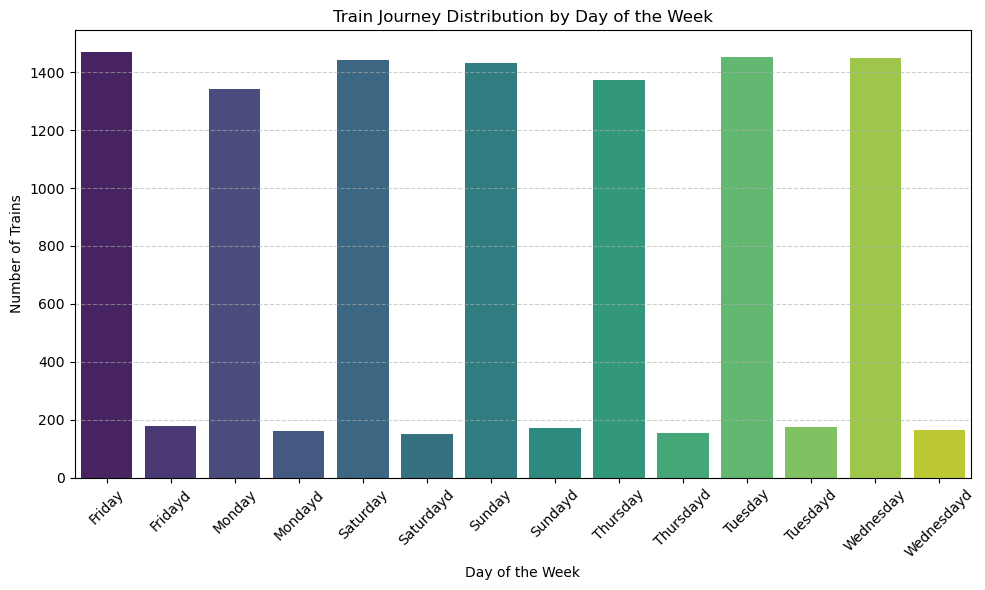

In [20]:
# Bar plot: train journeys throughout the week
plt.figure(figsize=(10, 6))
sns.barplot(x=journey_counts.index, y=journey_counts.values, palette='viridis')
plt.title('Train Journey Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1968\2453612824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='crest')


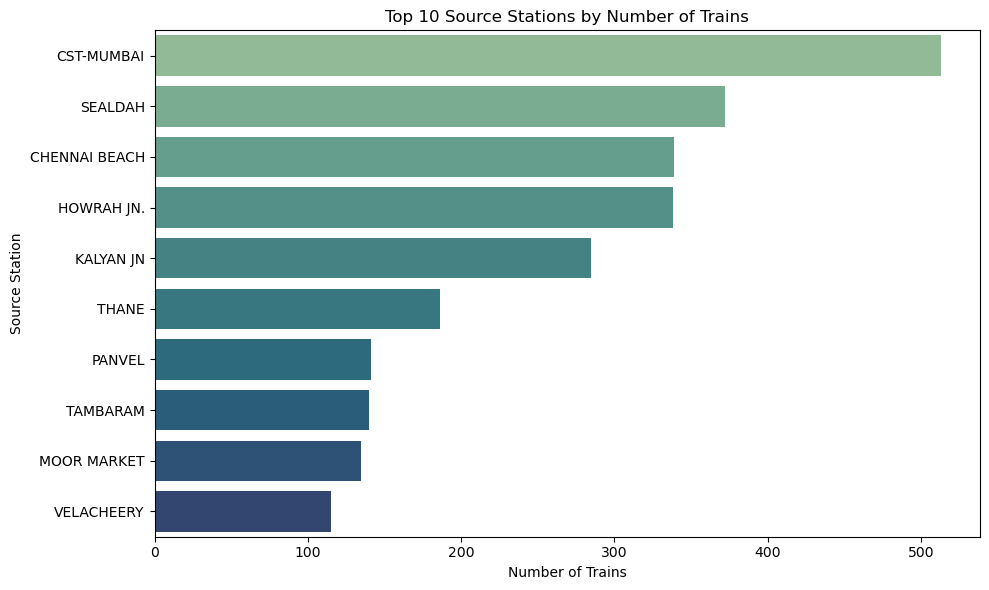

C:\Users\DELL\AppData\Local\Temp\ipykernel_1968\2453612824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.values, y=top_destinations.index, palette='magma')


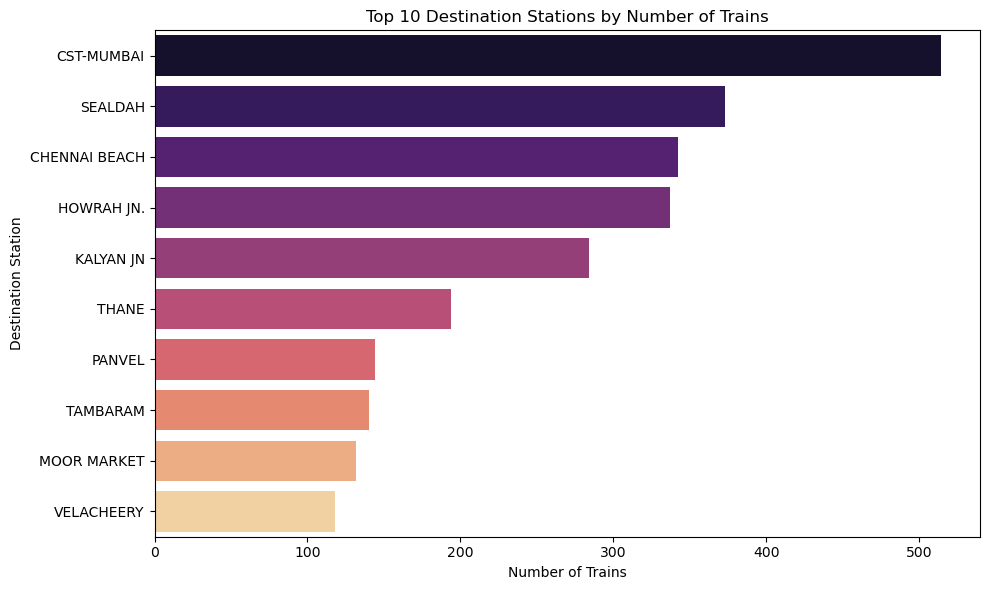

In [21]:
# Top 10 Source Stations
top_sources = df['Source_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.values, y=top_sources.index, palette='crest')
plt.title('Top 10 Source Stations by Number of Trains')
plt.xlabel('Number of Trains')
plt.ylabel('Source Station')
plt.tight_layout()
plt.show()

# Top 10 Destination Stations
top_destinations = df['Destination_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.values, y=top_destinations.index, palette='magma')
plt.title('Top 10 Destination Stations by Number of Trains')
plt.xlabel('Number of Trains')
plt.ylabel('Destination Station')
plt.tight_layout()
plt.show()

In [22]:
#Task 3.2: Correlation and Insights
#Explore if there is any correlation between the number of trains and specific days of the week.
#Provide insights and recommendations based on the analysis.

In [23]:
# Create DataFrame of counts
day_df = df['days'].value_counts().sort_index().reset_index()
day_df.columns = ['Day', 'Train_Count']

# Display table
print(day_df)

           Day  Train_Count
0       Friday         1471
1      Fridayd          178
2       Monday         1342
3      Mondayd          161
4     Saturday         1441
5    Saturdayd          152
6       Sunday         1432
7      Sundayd          170
8     Thursday         1372
9    Thursdayd          154
10     Tuesday         1454
11    Tuesdayd          174
12   Wednesday         1448
13  Wednesdayd          164


In [24]:
# Display high and low train operation days
most_busy_day = day_df.loc[day_df['Train_Count'].idxmax()]
least_busy_day = day_df.loc[day_df['Train_Count'].idxmin()]

print(f"📌 Most busy day: {most_busy_day['Day']} with {most_busy_day['Train_Count']} trains.")
print(f"📌 Least busy day: {least_busy_day['Day']} with {least_busy_day['Train_Count']} trains.")

print("\n🧠 Insights & Recommendations:")
print("1. There is a fairly even distribution of trains across days, with slightly higher volume on some days like Friday and Tuesday.")
print("2. Stations like CST-MUMBAI, SEALDAH, and CHENNAI BEACH are major train hubs — good candidates for adding new routes or increasing frequency.")
print("3. Data contains some noisy entries like 'Fridayd' — suggest cleaning these for better grouping in future analysis.")

📌 Most busy day: Friday with 1471 trains.
📌 Least busy day: Saturdayd with 152 trains.

🧠 Insights & Recommendations:
1. There is a fairly even distribution of trains across days, with slightly higher volume on some days like Friday and Tuesday.
2. Stations like CST-MUMBAI, SEALDAH, and CHENNAI BEACH are major train hubs — good candidates for adding new routes or increasing frequency.
3. Data contains some noisy entries like 'Fridayd' — suggest cleaning these for better grouping in future analysis.


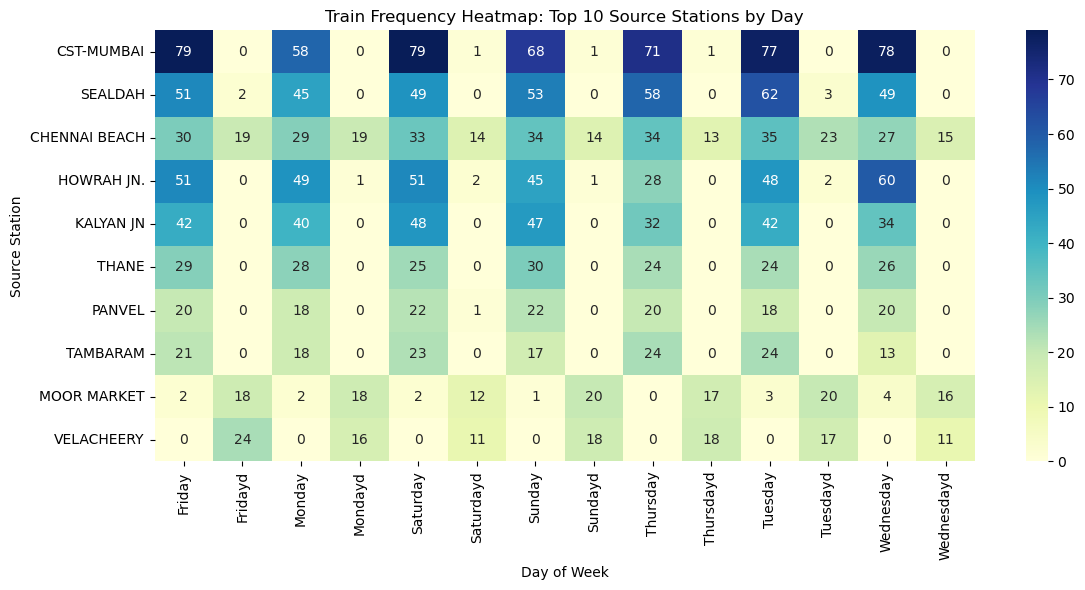

In [25]:
# Create a pivot table for heatmap
heatmap_data = pd.pivot_table(df, index='Source_Station_Name', columns='days',
                               values='Train_No', aggfunc='count', fill_value=0)

# Display top 10 busiest stations (rows)
heatmap_data_top = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Train Frequency Heatmap: Top 10 Source Stations by Day')
plt.xlabel('Day of Week')
plt.ylabel('Source Station')
plt.tight_layout()
plt.show()